Importing the Dependencies

In [1]:
import kaggle as kg
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:

# Download the dataset
os.environ['KAGGLE_USERNAME'] = 'firrex'
os.environ['KAGGLE_KEY'] = 'ce0e7c23f4f3624c6b36e0c5733d845f'

kg.api.authenticate()


In [3]:
kg.api.dataset_download_files('fmendes/fmendesdat263xdemos', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos


Data Collection and Processing

In [4]:
calories = pd.read_csv('data/calories.csv')

In [5]:
#first 5 rows
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise_data = pd.read_csv('data/exercise.csv')

In [7]:
#first 5 rows
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the Data

In [8]:
calories_data = pd.merge(exercise_data, calories, on='User_ID')

In [9]:
#first 5 rows
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
#shape of the data
calories_data.shape

(15000, 9)

In [11]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [13]:
#statistical measures of the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [15]:
sns.set_theme()

<Axes: xlabel='Gender', ylabel='count'>

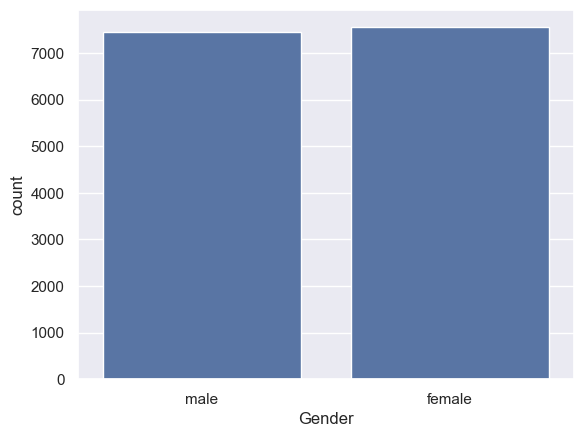

In [16]:
#plotting the gender column in count plot
sns.countplot(x = 'Gender', data = calories_data)

(array([1498., 1272., 1238., 1043.,  975.,  889.,  847.,  759.,  725.,
         650.,  642.,  622.,  549.,  551.,  538.,  478.,  449.,  467.,
         398.,  410.]),
 array([20.  , 22.95, 25.9 , 28.85, 31.8 , 34.75, 37.7 , 40.65, 43.6 ,
        46.55, 49.5 , 52.45, 55.4 , 58.35, 61.3 , 64.25, 67.2 , 70.15,
        73.1 , 76.05, 79.  ]),
 <BarContainer object of 20 artists>)

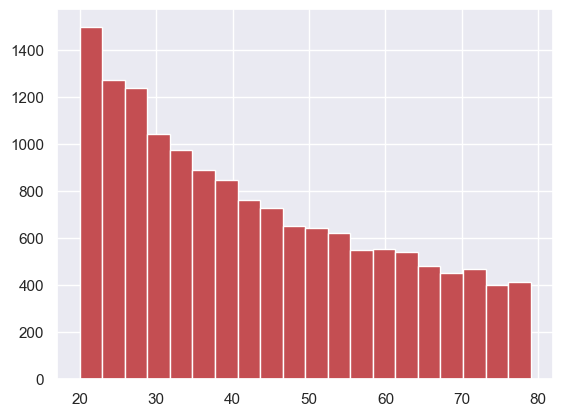

In [17]:
#plotting the age column in histogram
plt.hist(calories_data['Age'], bins = 20, color = 'r')

<Axes: xlabel='Weight', ylabel='Count'>

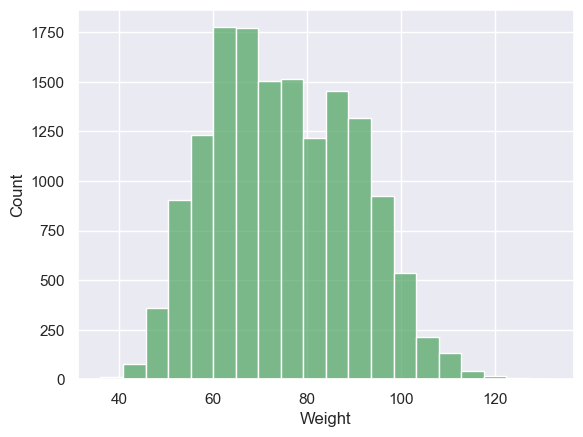

In [19]:
#plotting the weight column in histogram
sns.histplot(calories_data['Weight'], bins = 20, color = 'g')

<Axes: xlabel='Height', ylabel='Count'>

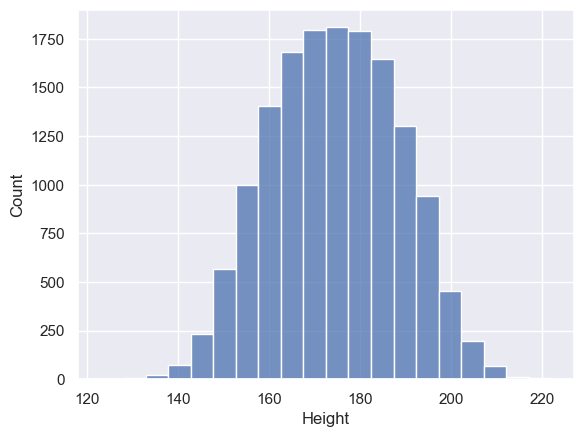

In [20]:
#plotting the height column in histogram
sns.histplot(calories_data['Height'], bins = 20, color = 'b')

<Axes: xlabel='Duration', ylabel='Count'>

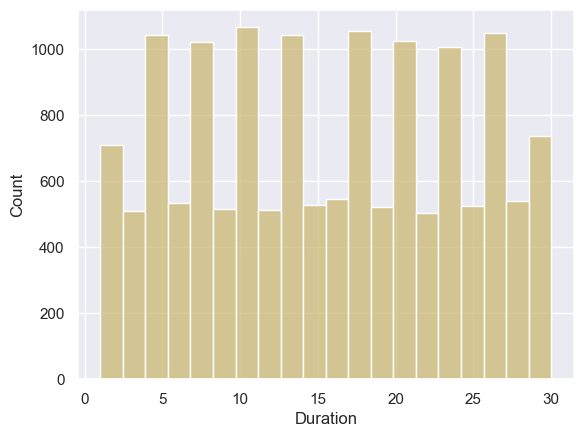

In [21]:
#plotting the duration column in histogram
sns.histplot(calories_data['Duration'], bins = 20, color = 'y')

<Axes: xlabel='Heart_Rate', ylabel='Count'>

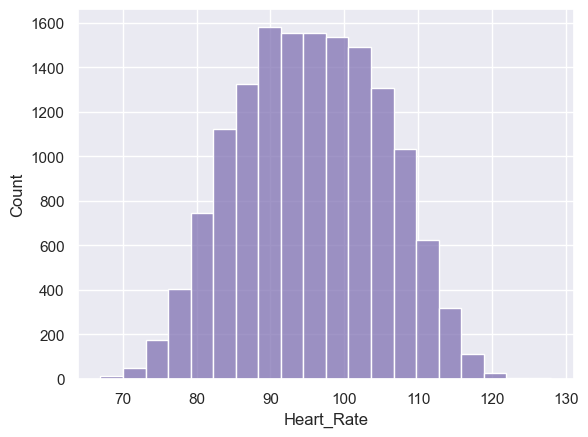

In [22]:
#plotting the heart rate column in histogram
sns.histplot(calories_data['Heart_Rate'], bins = 20, color = 'm')

<Axes: xlabel='Body_Temp', ylabel='Count'>

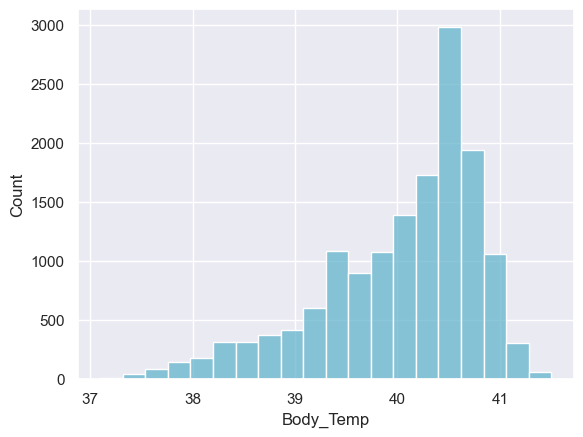

In [23]:
#plotting the body temperature column in histogram
sns.histplot(calories_data['Body_Temp'], bins = 20, color = 'c')

<Axes: xlabel='Calories', ylabel='Count'>

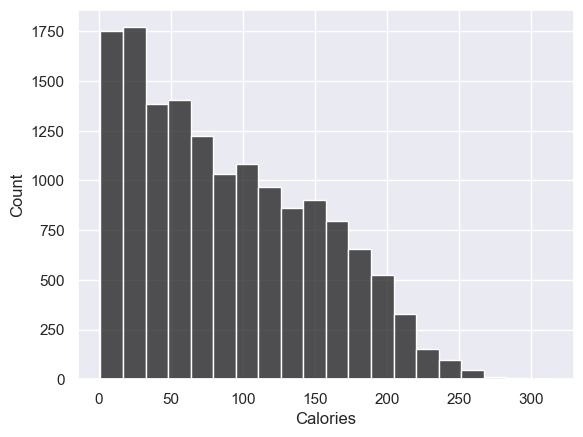

In [24]:
#plotting the calories column in histogram
sns.histplot(calories_data['Calories'], bins = 20, color = 'k')

Finding the Correlation

1. Positive Correlation
2. Negative Correlation

Encoding the Categorical Data

In [28]:
# Encode categorical variables
label_encoder = LabelEncoder()
calories_data['Gender'] = label_encoder.fit_transform(calories_data['Gender'])


In [29]:
#constructing the heatmap
correlation = calories_data.corr()

<Axes: >

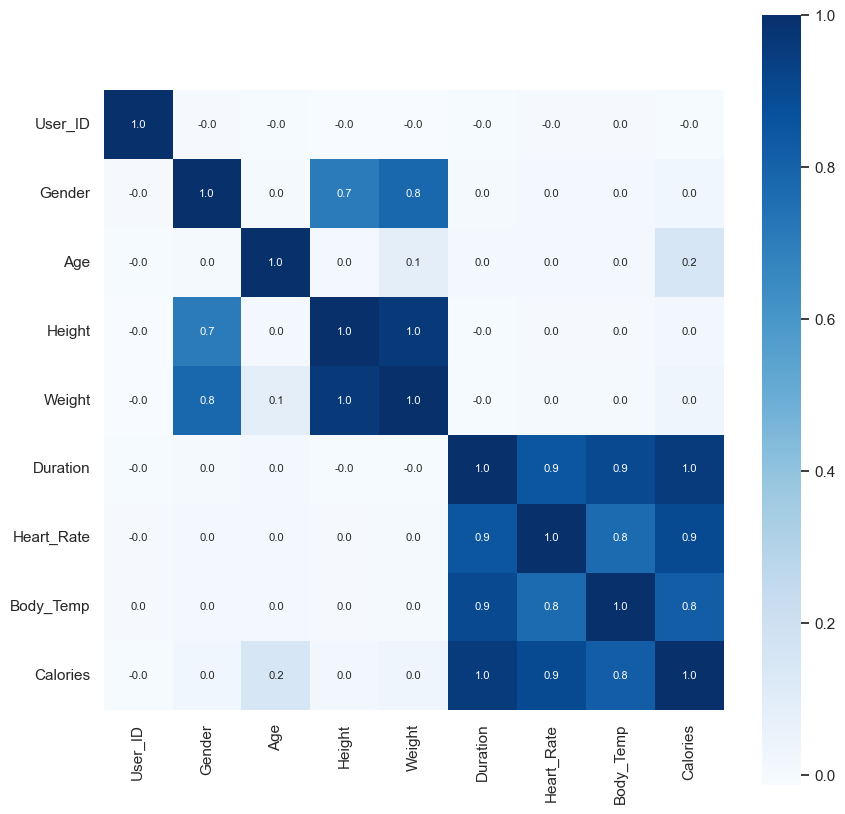

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square= True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')

Separating the Features and Target

In [31]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']

Train Test Split

In [32]:
X_train, X_Test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) 

In [33]:
print(X.shape, X_train.shape, X_Test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [34]:
#model training
model = XGBRegressor()

In [35]:
#fit the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

Mean Absolute Error

In [41]:
test_data_prediction = model.predict(X_Test)
test_mae = metrics.mean_absolute_error(test_data_prediction,Y_test)
print("Mean Absolute Error on test data : ",test_mae)

Mean Absolute Error on test data :  1.4833678883314132
